In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Learn_NLP/2Cap_picture

/content/drive/MyDrive/Learn_NLP/2Cap_picture


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten,Reshape, GRU, LSTM, Embedding, AveragePooling2D, Concatenate, Add, Input, Dropout
from tensorflow.keras import Sequential, Model
from tensorflow.keras.applications import VGG16, InceptionV3
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# cnn_model = VGG16(input_shape=(224,224,3), include_top=True, weights='imagenet')
# cnn_model = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-3].output)
# cnn_model.summary()

553476096/553467096 [==============================] - 21s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
cnn_model = InceptionV3(weights='imagenet')
cnn_model = Model(cnn_model.input, cnn_model.layers[-2].output)
cnn_model.summary()

96124928/96112376 [==============================] - 4s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                

In [ ]:
def img_to_feauture(path_img):
  img = image.load_img(path_img, target_size=(299,299))
  tensor = image.img_to_array(img)
  tensor = tensor/255.
  tensor = np.expand_dims(tensor, axis=0)
  feauture = cnn_model.predict(tensor)
  feauture = Flatten()(feauture)
  feauture = feauture[0]
  return feauture

In [ ]:
def process_sentence(sentence):
  new_sentence = 'startsent'
  desc = sentence.split()
  # convert to lower case
  desc = [word.lower() for word in desc]
  # remove hanging 's' and 'a'
  desc = [word for word in desc if len(word)>1]
  # remove punctuation from each token
  desc = [word[:-1] if word[-1] in ['.', ',', ';'] else word for word in desc]
  # remove tokens with numbers in them
  desc = [word for word in desc if word.isalpha()]
  # remove punctuation from each token
  for word in desc:
    new_sentence += ' ' + word
  new_sentence += ' ' + 'endsent'

  return new_sentence

In [ ]:
f = open('Flickr8k/text/Flickr8k.lemma.token.txt', 'r')
data = f.readlines()
print(len(data))

40460


In [ ]:
# Tách riêng ảnh, câu
imgs = []
sentences = []
for i in range(len(data)):
  spl = data[i].split("\t")
  img = spl[0]
  sentence = spl[1]
  imgs.append(img)
  sentences.append(process_sentence(sentence))

len(sentences)

40460

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [ ]:
tokenizer.index_word

{1: 'startsent',
 2: 'endsent',
 3: 'in',
 4: 'be',
 5: 'on',
 6: 'the',
 7: 'dog',
 8: 'and',
 9: 'man',
 10: 'with',
 11: 'of',
 12: 'two',
 13: 'boy',
 14: 'girl',
 15: 'woman',
 16: 'person',
 17: 'white',
 18: 'black',
 19: 'run',
 20: 'play',
 21: 'wear',
 22: 'stand',
 23: 'to',
 24: 'at',
 25: 'jump',
 26: 'water',
 27: 'child',
 28: 'young',
 29: 'red',
 30: 'an',
 31: 'brown',
 32: 'his',
 33: 'sit',
 34: 'blue',
 35: 'through',
 36: 'walk',
 37: 'while',
 38: 'hold',
 39: 'shirt',
 40: 'ball',
 41: 'down',
 42: 'little',
 43: 'ride',
 44: 'grass',
 45: 'look',
 46: 'snow',
 47: 'over',
 48: 'front',
 49: 'three',
 50: 'small',
 51: 'field',
 52: 'large',
 53: 'up',
 54: 'by',
 55: 'green',
 56: 'group',
 57: 'one',
 58: 'yellow',
 59: 'her',
 60: 'into',
 61: 'air',
 62: 'beach',
 63: 'mouth',
 64: 'near',
 65: 'player',
 66: 'rock',
 67: 'dress',
 68: 'bike',
 69: 'street',
 70: 'another',
 71: 'for',
 72: 'its',
 73: 'from',
 74: 'as',
 75: 'climb',
 76: 'watch',
 77: 'out

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

6293

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
lengths = [len(sequence) for sequence in sequences]
max_length = max(lengths) - 1
max_length

32

In [ ]:
len(sequences)

40460

In [ ]:
direc = {}
for i in range(len(imgs)):
  direc[imgs[i][:-2]] = []
for i in range(len(imgs)):
  direc[imgs[i][:-2]].append(sequences[i])

In [ ]:
len(direc)

8092

In [ ]:
# Chuẩn bị dữ liệu X_train, Y_train 
X_imgs = []
X_seqs = []
Y = []

n = 0
for img in direc:
  n += 1
  try:
    path_img = "Flickr8k/Imgs/" + img
    try:
      feauture = img_to_feauture(path_img)
    except Exception as e:
      print(e)
      continue
    
    five_seqs = direc[img]
    for seq in five_seqs:
      for i in range(1, len(seq)):
        in_seq = seq[:i]
        out_seq = seq[i]
        # out_seq = to_categorical(out_seq, num_classes=vocab_size)

        X_imgs.append(feauture)
        X_seqs.append(in_seq)
        Y.append(out_seq)
  except Exception as e:
    print(e)
  
  if n%100==0:
    print(n)

X_imgs = np.array(X_imgs)
Y = np.array(Y)
X_seqs = pad_sequences(X_seqs, maxlen=max_length)
  

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
[Errno 2] No such file or directory: 'Flickr8k/Imgs/2258277193_586949ec62.jpg.1'
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000


In [ ]:
print(X_imgs.shape)
print(Y.shape)
print(X_seqs.shape)

NameError: ignored

In [ ]:
np.save('Flickr8k/npy/mine1_incepv3/X_imgs.npy', X_imgs)
np.save('Flickr8k/npy/mine1_incepv3/X_seqs.npy', X_seqs)
np.save('Flickr8k/npy/mine1_incepv3/Y.npy', Y)

In [ ]:
X_imgs = np.load('Flickr8k/npy/mine1/X_imgs.npy')
X_seqs = np.load('Flickr8k/npy/mine1/X_seqs.npy')
Y = np.load('Flickr8k/npy/mine1/Y.npy')

In [ ]:
# # Chuẩn bị dữ liệu X_train, Y_train (giới hạn 6000/8092 ảnh)
# def data_generator(num_imgs_per_batch=6):
#   X_imgs, X_seqs, Y = list(), list(), list()
#   n = 0

#   while 1:
#     for img in direc:
#       try:
#         path_img = "Flickr8k/Imgs/" + img
#         try:
#           feauture = img_to_feauture(path_img)
#           n += 1
#         except Exception as e:
#           # print(e)
#           continue
        
#         five_seqs = direc[img]
#         for seq in five_seqs:
#           for i in range(1, len(seq)):
#             in_seq = seq[:i]
#             out_seq = seq[i]
#             out_seq = to_categorical(out_seq, num_classes=vocab_size)

#             X_imgs.append(feauture)
#             X_seqs.append(in_seq)
#             Y.append(out_seq)

#         if n==num_imgs_per_batch:
#           X_imgs = np.array(X_imgs)
#           Y = np.array(Y)
#           X_seqs = pad_sequences(X_seqs, maxlen=max_length, padding='post')
          
#           yield [[X_imgs, X_seqs], Y]
#           X_imgs, X_seqs, Y = list(), list(), list()
#           n = 0
#       except Exception as e:
#         print(e)

In [ ]:
# # Chuẩn bị dữ liệu X_train, Y_train (giới hạn 6000/8092 ảnh)
# X_imgs, X_seqs, Y = [], [], []
# n = 0
# for img in direc:
#   n += 1
#   try:
#     path_img = "Flickr8k/Imgs/" + img
#     try:
#       feauture = img_to_feauture(path_img)
#     except Exception as e:
#       print(e)
#       continue
    
#     five_seqs = direc[img]
#     for seq in five_seqs:
#       in_seq = seq[:-1]
#       out_seq = seq[1:]
#       # out_seq = to_categorical(out_seq, num_classes=vocab_size)

#       X_imgs.append(feauture)
#       X_seqs.append(in_seq)
#       Y.append(out_seq)

#   except Exception as e:
#     print(e)
  
#   if n%50==0:
#     print(n)
#   # if n==3000:
#   #   break
  
# X_imgs = np.array(X_imgs)
# print('ok')
# Y = pad_sequences(Y, maxlen=max_length, padding='post')
# print('ok')
# X_seqs = pad_sequences(X_seqs, maxlen=max_length, padding='post')
# print('ok')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input2 (InputLayer)            [(None, 32)]         0           []                               
                                                                                                  
 Input1 (InputLayer)            [(None, 2048)]       0           []                               
                                                                                                  
 Embedding (Embedding)          (None, 32, 64)       402752      ['Input2[0][0]']                 
                                                                                                  
 Dropout1 (Dropout)             (None, 2048)         0           ['Input1[0][0]']                 
                                                                                              

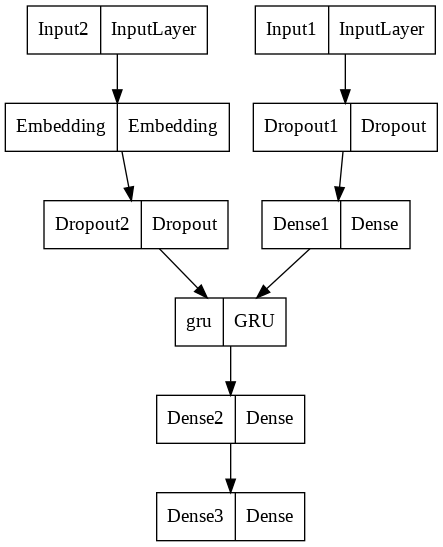

In [ ]:
# Build model
def build_model(embedding_dim=64):
  inputs1 = Input(shape=(2048,), name="Input1")
  fe1 = Dropout(0.5, name="Dropout1")(inputs1)
  fe2 = Dense(256, activation='relu', name="Dense1")(fe1)

  inputs2 = Input(shape=(max_length,), name="Input2")
  se1 = Embedding(vocab_size, embedding_dim, mask_zero=True, name="Embedding")(inputs2)
  se2 = Dropout(0.5, name="Dropout2")(se1)
  out1 = GRU(256, name="gru")(se2, initial_state=fe2)
  out2 = Dense(256, name="Dense2")(out1)
  outputs = Dense(vocab_size, activation='softmax', name="Dense3")(out2)
  model = Model(inputs=[inputs1, inputs2], outputs=outputs, name="model")

  return model
model = None
model = build_model(64)
# with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
#   model = build_model(64)
model.summary()
tf.keras.utils.plot_model(model, "/content/model.png")

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.optimizer.lr = 0.0001

In [ ]:
# Train model
model.fit(x=[X_imgs, X_seqs], y=Y, epochs=10, steps_per_epoch=1000, verbose=1, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 91s 91ms/step - loss: 3.2237 - val_loss: 3.9327
Epoch 2/10
1000/1000 [==============================] - 90s 90ms/step - loss: 3.1778 - val_loss: 3.9283
Epoch 3/10
1000/1000 [==============================] - 89s 89ms/step - loss: 3.1357 - val_loss: 3.9043
Epoch 4/10
1000/1000 [==============================] - 89s 89ms/step - loss: 3.0983 - val_loss: 3.8933
Epoch 5/10
1000/1000 [==============================] - 89s 89ms/step - loss: 3.0613 - val_loss: 3.9069
Epoch 6/10
1000/1000 [==============================] - 89s 89ms/step - loss: 3.0269 - val_loss: 3.8849
Epoch 7/10
1000/1000 [==============================] - 91s 91ms/step - loss: 2.9948 - val_loss: 3.8734
Epoch 8/10
1000/1000 [==============================] - 89s 89ms/step - loss: 2.9658 - val_loss: 3.8722
Epoch 9/10
1000/1000 [==============================] - 89s 90ms/step - loss: 2.9374 - val_loss: 3.8803
Epoch 10/10
1000/1000 [==============================] - 90s 90m

In [ ]:
# generator = data_generator(num_imgs_per_batch=6)
# step = int(8091/6)
# model.fit(generator, epochs=20, verbose=1, steps_per_epoch=step)

In [ ]:
model.save_weights('Flickr8k/model_weights/my_model_2st.h5')

In [ ]:
model.load_weights('Flickr8k/model_weights/my_model_2st.h5')

In [ ]:
def predict_img_cap(path_img):
  feauture = img_to_feauture(path_img)
  feauture = np.expand_dims(feauture, axis=0)

  seq = tokenizer.texts_to_sequences(['startsent'])
  for i in range(max_length):
    in_seq = pad_sequences(seq, maxlen=max_length)
    # in_seq = np.expand_dims(in_seq, axis=0)
    out = model.predict([feauture, in_seq])[0]
    out_seq = np.argmax(out)
    seq[0].append(out_seq)
    if out_seq==tokenizer.word_index['endsent']:
      break

  sent = tokenizer.sequences_to_texts(seq)
  return sent

In [ ]:
for i in range(39950,40000,5):  
  index = i
  path_img = 'Flickr8k/Imgs/'+ imgs[index][:-2]
  predict = predict_img_cap(path_img)
  img = cv2.imread(path_img)
  cv2_imshow(img)
  print(predict[0][10:-8])

Output hidden; open in https://colab.research.google.com to view.